In [4]:
import os

import pandas as pd
import numpy as np
from datetime import datetime

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!wget https://github.com/ALKONDR/netology-recsys/archive/refs/heads/master.zip
!unzip master.zip

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [ ]:
prefix = 'netology-recsys-master/lecture-1'

links = pd.read_csv(os.path.join(prefix, 'links.csv'))
movies = pd.read_csv(os.path.join(prefix, 'movies.csv'))
ratings = pd.read_csv(os.path.join(prefix, 'ratings.csv'))
tags = pd.read_csv(os.path.join(prefix, 'tags.csv'))

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


array([[<Axes: title={'center': 'tag'}>]], dtype=object)

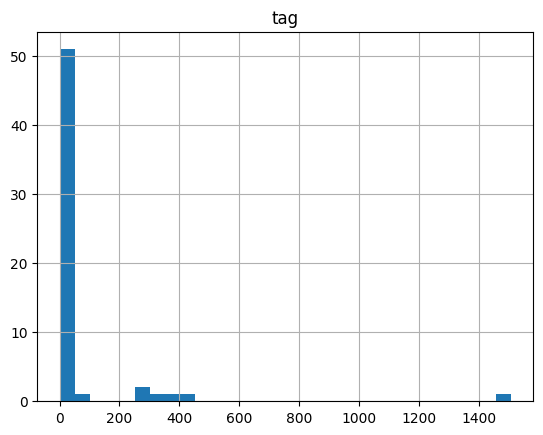

In [ ]:
tags.groupby('userId')[['tag']].count().hist(bins=30)

In [ ]:
tags.groupby('userId').tag.count().median()

4.0

In [ ]:
tags.groupby('userId').tag.count().mean()

63.5

<Axes: >

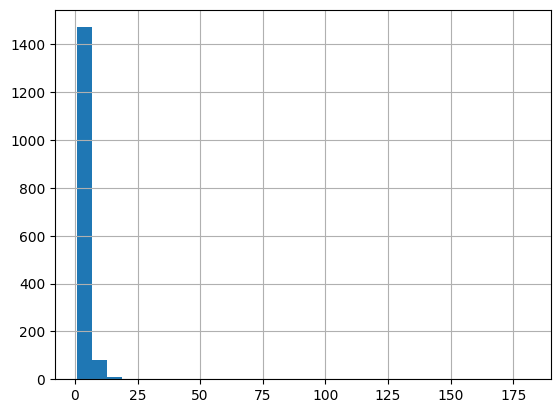

In [ ]:
tags.groupby('movieId').tag.count().hist(bins=30)

In [ ]:
tags.groupby('movieId').tag.count().mean()

2.3428753180661577

In [ ]:
tags.groupby('movieId').tag.count().median()

1.0

In [ ]:
year_month = []

for t in tqdm_notebook(tags.timestamp.values):
    d = datetime.fromtimestamp(t)
    year_month.append(str(d.year) + '-' + str(d.month))

<ipython-input-14-322818ccabeb>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm_notebook(tags.timestamp.values):


  0%|          | 0/3683 [00:00<?, ?it/s]

In [ ]:
tags['year_month'] = np.array(year_month)

In [ ]:
tags.head()

,userId,movieId,tag,timestamp,year_month
0,2,60756,funny,1445714994,2015-10
1,2,60756,Highly quotable,1445714996,2015-10
2,2,60756,will ferrell,1445714992,2015-10
3,2,89774,Boxing story,1445715207,2015-10
4,2,89774,MMA,1445715200,2015-10


In [ ]:
sorted(tags.year_month.apply(lambda x: x.split('-')), key=lambda x: x[0])[:10]

[['2006', '11'],
 ['2006', '10'],
 ['2006', '10'],
 ['2006', '10'],
 ['2006', '8'],
 ['2006', '10'],
 ['2006', '10'],
 ['2006', '10'],
 ['2006', '6'],
 ['2006', '3']]

<Axes: >

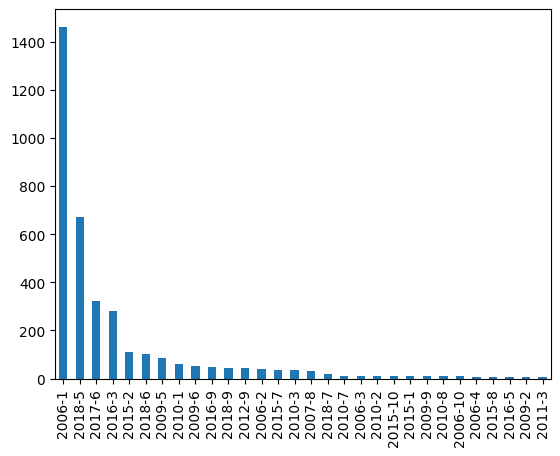

In [ ]:
tags.year_month.value_counts()[:30].plot.bar()

<Axes: >

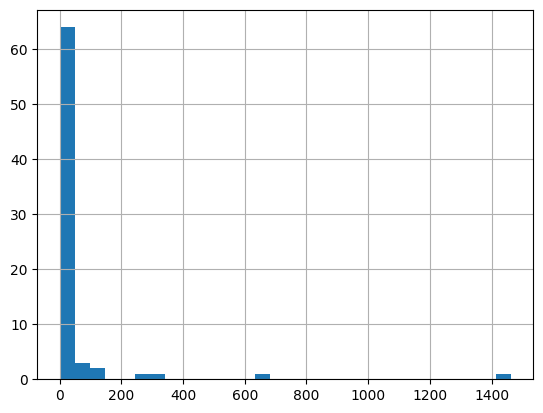

In [ ]:
tags.groupby('year_month').tag.count().hist(bins=30)

In [ ]:
tags.groupby('year_month').tag.count().mean()

50.45205479452055

In [ ]:
tags.groupby('year_month').tag.count().median()

5.0

In [ ]:
movies.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

In [ ]:
movies.genres[0].split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [ ]:
#num_genres_on_movie = [len(g.split('|')) for g in movies.genres.values]
num_genres_on_movie = movies.genres.apply(lambda x: len(x.split('|')))

In [ ]:
num_genres_on_movie[1]

3

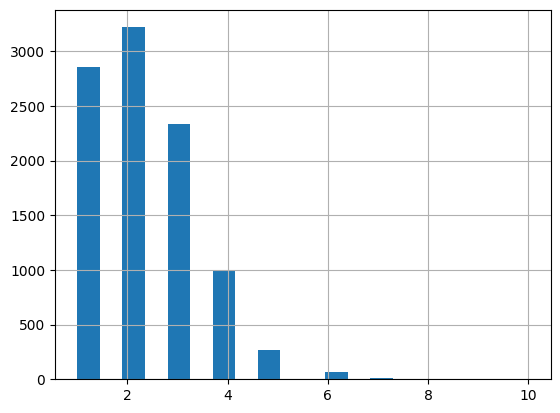

In [ ]:
plt.grid()
plt.hist(num_genres_on_movie, bins=20)
plt.show()

In [ ]:
np.mean(num_genres_on_movie)

2.2668856497639087

In [ ]:
np.median(num_genres_on_movie)

2.0